In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df=df.drop('CustomerID',axis=1)

In [9]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
scaler=StandardScaler()
le=LabelEncoder()

scaler.fit(df[['Age','Annual Income (k$)','Spending Score (1-100)']])
df[['Age','Annual Income (k$)','Spending Score (1-100)']]=scaler.transform(df[['Age','Annual Income (k$)','Spending Score (1-100)']])
df['Gender']=le.fit_transform(df['Gender'])

In [11]:
le.classes_

array(['Female', 'Male'], dtype=object)

PCA visualization

In [12]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
df_pca=pca.fit_transform(df)

In [13]:
df_pca

array([[-0.60043766, -1.73717898],
       [-1.64988591, -1.78912423],
       [ 0.31538132, -1.69277231],
       [-1.47798868, -1.78131664],
       [-0.06054496, -1.67869121],
       [-1.5029612 , -1.7438065 ],
       [ 1.07202103, -1.58773793],
       [-1.94718878, -1.72769057],
       [ 2.65927595, -1.4504641 ],
       [-0.99141027, -1.64691155],
       [ 2.50988817, -1.45931005],
       [-1.47785399, -1.67316678],
       [ 1.98742066, -1.47928386],
       [-1.43412929, -1.62698028],
       [ 1.01549562, -1.4775323 ],
       [-1.55292967, -1.59402762],
       [ 0.27232193, -1.5119479 ],
       [-1.2997754 , -1.54249961],
       [ 1.33203751, -1.35564719],
       [-1.45726454, -1.51942393],
       [ 0.30455257, -1.3581841 ],
       [-1.24333274, -1.42787781],
       [ 1.644869  , -1.29854428],
       [-0.94101737, -1.37824333],
       [ 1.79852122, -1.18081367],
       [-1.29406171, -1.27973079],
       [ 0.84929965, -1.22201945],
       [-0.41464999, -1.24030551],
       [ 0.6216485 ,

In [24]:
from sklearn.cluster import KMeans
k = 5

kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(df_pca)



In [33]:
df_pca=pd.DataFrame(df_pca)
pca_data=pd.DataFrame(df_pca)

In [36]:
pca_data=pca_data.drop('Cluster',axis=1)

In [37]:
pca_data.head()

,0,1
0,-0.600438,-1.737179
1,-1.649886,-1.789124
2,0.315381,-1.692772
3,-1.477989,-1.781317
4,-0.060545,-1.678691


In [38]:
cluster_labels

array([2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 4, 1,
       1, 4, 4, 1, 4, 4, 1, 1, 4, 1, 4, 1, 1, 4, 4, 1, 4, 1, 4, 4, 4, 4,
       4, 1, 4, 1, 1, 1, 4, 4, 4, 4, 1, 4, 1, 1, 1, 1, 4, 1, 4, 1, 4, 1,
       1, 1, 4, 1, 4, 1, 4, 1, 4, 1, 1, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 3, 1, 4, 1, 3, 1, 4, 1, 4, 1, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int32)

In [26]:
df_pca['Cluster'] = cluster_labels
df_pca.head()

,0,1,Cluster
0,-0.600438,-1.737179,2
1,-1.649886,-1.789124,2
2,0.315381,-1.692772,0
3,-1.477989,-1.781317,2
4,-0.060545,-1.678691,2


Elbow Method

In [56]:
WCSS = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_data)
    WCSS.append(kmeans.inertia_)

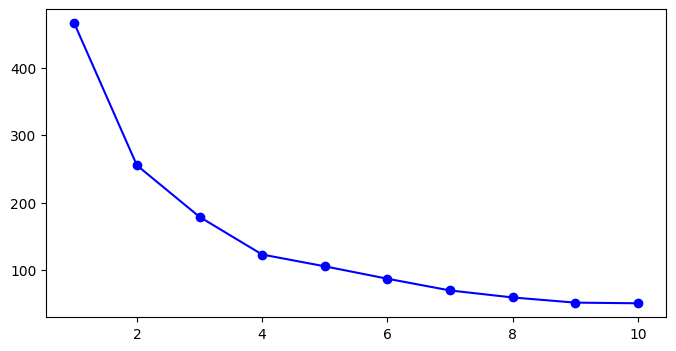

In [57]:
plt.figure(figsize=(8, 4))
plt.plot(k_range, WCSS, 'bo-')

In [58]:
pca_data[1]

,1
0,-1.737179
1,-1.789124
2,-1.692772
3,-1.781317
4,-1.678691
...,...
195,2.201867
196,2.517450
197,2.470818
198,2.964343


k=5 is optimum for this

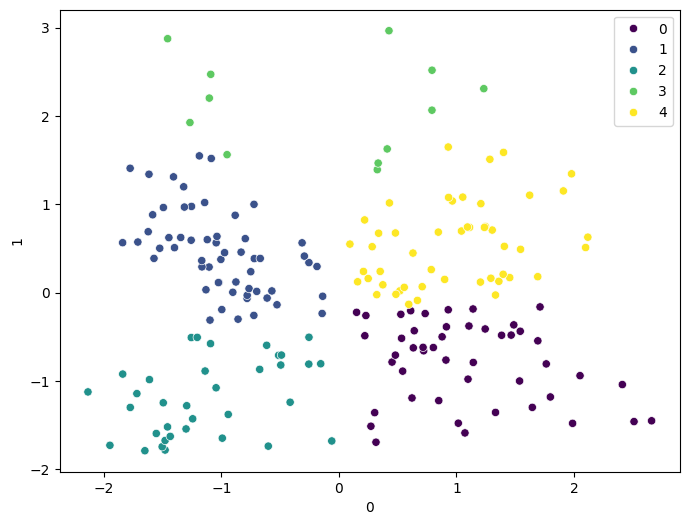

In [51]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(pca_data)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_data[0], y=pca_data[1], hue=labels,palette='viridis')
plt.show()

In [59]:
labels

array([2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 4, 1,
       1, 4, 4, 1, 4, 4, 1, 1, 4, 1, 4, 1, 1, 4, 4, 1, 4, 1, 4, 4, 4, 4,
       4, 1, 4, 1, 1, 1, 4, 4, 4, 4, 1, 4, 1, 1, 1, 1, 4, 1, 4, 1, 4, 1,
       1, 1, 4, 1, 4, 1, 4, 1, 4, 1, 1, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 3, 1, 4, 1, 3, 1, 4, 1, 4, 1, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int32)

Silhouette score

In [53]:
from sklearn.metrics import silhouette_score

In [55]:
score = silhouette_score(pca_data, labels)
print(f"Silhouette Score for k={k}: {score:.3f}")

Silhouette Score for k=5: 0.392


In [ ]:
## good clusturing